# Calibration


## Calibration, Imbalanced Data

03/02/20

Andreas C. Müller



Today we'll expand on the model evaluation topic we started last week,
and we'll talk more on how we can build better models for imbalanced data

Today we’ll talk about working with imbalanced data. We
already talked about how accuracy is a bad measure and what
are the other measures we can use.

FIXME in calibration: make sure we have p(y=1) not p(y)?
FIXME what are the bins for calibration in first slide
FIXME write down definition for calibration
FIXME alpha value for curves
FIXME definition of balanced class weight
FIXME bullet points!!
FIXME balanced bagging is terrible now?
FIXME add more datasets for some benchmark?
FIXME: add example of calibrated and
inaccurate vs accurate but not calibrated! (always saying 50% is calibrated)
FIXME: brier score decomposition
FIXME calibration scores
FIXME maybe saying "sort" before binning is confusing?
FIXME maybe add why I don't like log loss here?
FIXME show that AUC is not changed by calibration?
FIXME show example of overconfident vs underconfident predictions more clearly

FIXME update metrics slides from metrics lecture
FIXME better illustration for sampling
FIXME better motivation for sampling / why we want to change things
FIXME Add estimators minimizing loss directly?
FIXME add more on imbalanced forest
FIXME better benchmarking for SMOTE
FIXME show grid-search results
FIXME grid-search SMOTE show uncertainty
FIXME research comparison papers more
FIXME smote: clarify to only sample from same class
FIXME smote: paper vs implementation: do along coordinates in rectangle?

#Calibration
.center[

Source

]
- Probabilities can be much more informative than labels:

- “The model predicted you don’t have cancer” vs “The model predicted you’re 40% likely to have cancer”



So the next thing I want to talk about is calibrations.
Calibration also builds a model on top of a model. But the
goal of calibration is to actually get accurate probability
estimates. Oftentimes, we’re interested not only in the
output of the classifier, but also interested in the
uncertainty estimate of a classifier.

So for example, think about a model that does cancer
prediction. If the model predicted you don't have cancer,
you're going to be pretty happy. If it says there’s a 40%
chance that you have cancer, which is the same thing if you
have a binary classification, you might be less happy since
40% seems pretty high for having cancer anyway.

So often, we want actual probability estimates that allow us
to make decisions that are finer grained than just a yes or
no.

Calibration is a way to get probability estimates out of any
models. For example, SVMs are not good at breaking
probabilities, so you can use calibration if you really want
to use an SVM and get the probabilities out. Or if you have
a model that already was able to predict probabilities like
tree or random forests or nearest neighbors, you can use
calibration to make sure that the probabilities that you get
are actually good probabilities. So if you use random forest
and use it to estimate probabilities, if it says “this is
70% class one”, it's not really clear what it means because
the model is not really trained to optimize probability
estimates so the probability estimates could be off quite a
bit.

#Calibration curve (Reliability diagram)
.left-column[
![:scale 100%](images/prob_table.png)
]
.right-column[
![:scale 100%](images/calib_curve.png)

]



Before we talk about how to do calibration, I want to talk
about how to measure calibration and binary classification.
You can also do it for multiclass classification, but binary
is much simpler. The cool thing about it is you can actually
measure calibration and you can calibrate the classifier
without having round first the probability estimates. So
even if you only have like 0 or 1 labels you can still make
sure that you have a model that provides reasonable
probabilities.

The way you do this if you take the probability estimates of
the model, you bin the probability... So here, for example,
let's say these are probabilities estimate by a model, these
are my true targets. So now I sort and bin them by the
probability estimates.

And then I create three bins. And then I look at what is the
actual prevalence of the classes in each of these bins.

If these probabilities estimates were actually accurate,
then let's say if I have a bin for all the 90% ones, the
prevalence in the 90% bin should actually be 90%, that's
sort of what it says. 90% of the points that are given a
score of 90% should be the true class. And so you can plot
this in the calibration curve or the reliability diagram.

So here I have three bins. And basically what I wanted is
the diagonal line where the bin that contains the very small
probabilities has the same prevalence. And so here, for
example, things that are around like 0.5 actually have zero
prevalence. So there's no true class in there, which is
really weird. You won’t use a diagonal line, this would be a
very bad classifier.

One thing that I want to emphasize here is that calibration
doesn't imply that the model is accurate. These are actually
two different things. If I have a binary model on a balanced
data set, and it always says 50% probability for all data
points. It's perfectly calibrated because it says 50% for
all data points. 50% of those data points are actually the
true class if the dataset is balanced. So it's a completely
trivial classifier that doesn't tell you anything but
perfectly calibrated, but also kind of tells you nothing
because it always gives you 0.5. So you know that you can
trust it basically.

Calibration basically tells you how much you can trust the
model.


- For binary classification only
- you can be calibrated and inaccurate!
- Given a predicted ranking or probability from a supervised classifier, bin predictions.
- Plot fraction of data that’s positive in each bin.
- Doesn’t require ground truth probabilities!

## calibration_curve with sklearn

Using subsample of covertype dataset
.left-column[
.tiny-code[
```python
from sklearn.linear_model import LogisticRegressionCV
print(X_train.shape)
print(np.bincount(y_train))
lr = LogisticRegressionCV().fit(X_train, y_train)
(52292, 54)
[19036 33256]```


```python
lr.C_
array([ 2.783])
```

```python
print(lr.predict_proba(X_test)[:10])
print(y_test[:10])
[[ 0.681  0.319]
 [ 0.049  0.951]
 [ 0.706  0.294]
 [ 0.537  0.463]
 [ 0.819  0.181]
 [ 0.     1.   ]
 [ 0.794  0.206]
 [ 0.676  0.324]
 [ 0.727  0.273]
 [ 0.597  0.403]]
[0 1 0 1 1 1 0 0 0 1]
```

]
]

.right-column[
.tiny-code[
```python
from sklearn.calibration import calibration_curve
probs = lr.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=5)
print(prob_true)
print(prob_pred)
[ 0.2    0.303  0.458  0.709  0.934]
[ 0.138  0.306  0.498  0.701  0.926]
```
]
.center[![:scale 70%](images/predprob_positive.png)
]
]



I'm using a subsample of cover type dataset because it's
kind of big and we get some nice histograms here. So I train
a logistic regression model. Logistic regression typically
gives pretty good probability estimates. So I expect this
model to be relatively well calibrated.

For the first 10 data points, the probabilities and the
actual predictions. So what I'm going to take is the
predicted probabilities for all data points, for the first
class and the actual predictions.

Obviously, I need to do this on the test set. If I do this
on the training set, then it'll tell me nothing, because on
the training set the model is good. So either I need to do
this on a test set or on some of the holdout set. On the
training set, if I perfectly overfit, I would be doing
perfect, but that's not the point. So here, I need to use a
separate set and so I can compute the calibration curve.

You can see the histogram here shows how many points are in
this area. And here, the orange thing is the actual
calibration curve, the dotted line is sort of perfect
calibration. And in here, I’m using five bins. The first bin
is zero until 0.2, so I would expect that 10% of the data in
this bin 10 is the true class, but actually, it's more like
20%. So here, it's like not perfectly calibrated.

In the second bin from 0.2 to 0.4. So what I would expect is
that 30% of these data points are predicted as class one and
actually- it's 30%.

#Influence of number of bins

.center[![:scale 100%](images/influence_bins.png)]



How do I pick the number of bins?

More bins give me more resolution. But also at some point,
you get noise. So I guess it's the same way you would do for
histogram. You can use the standard heuristic for histogram
but usually, if you do something like 10 or 20, that's
usually enough bins.


- Works here because dataset is big
- Might become very noisy for larger datasets

## Comparing Models

.center[![:scale 90%](images/calib_curve_models.png)]


Logistic regression is pretty well calibrated. The decision
tree, since I didn't use any pruning, it'll be way too
certain. So all probabilities estimates, even on a test set
that will be either 0 or 1. So that's not very great. Random
forest classifier used here is not certain enough.

Now we want to fix that. Before I want to say how we can
trust them let's measure them first.

## Brier Score (for binary classification)

- “mean squared error of probability estimate”
$$ BS = \frac{\sum_{i=1}^{n} (\widehat{p} (y_i)-y_i)^{2}}{n}$$

.center[![:scale 70%](images/models_bscore.png)]


This graph is a nice way to look at how calibrated something
is. But it's very hard to compare. A standard way to compare
calibration is a Brier score, you could also use something
like a log loss. Log loss would also tell you how good that
a probability estimate is.

Brier score is the mean squared error of probability
estimates.  Yi is either one or zero, basically, and p ̂ is
the probability estimate.

So if you predict 0.5 then it's always going to give you a
loss, but it's going to give you a loss of only 0.5. If you
predict 0 when you should’ve predicted 1 then it's going to
give you a very large loss.

Here are the brier loss for the different models. Also, the
smaller is better. But this conflates accuracy and
calibration a little bit because here, you can see that the
random forest actually does best-.

I guess it does better because just it's a more accurate
model. So it's not well calibrated. But it is actually a
much better predictor and so it still has a smaller score.

We defined it, we can measure it and we actually want to
calibrate it.

## Fixing it: Calibrating a classifier
- Build another model, mapping classifier probabilities to better probabilities!
- 1d model! (or more for multi-class)

$$ f_{calib}(s(x)) \approx p(y)$$



- s(x) is score given by model, usually
- Can also work with models that don’t even provide probabilities!
Need model for $f_{calib}$, need to decide what data to train it on.
- Can train on training set → Overfit
- Can train using cross-validation → use data, slower



The way to do fix this is similar to stacking and that we
built another model on top of the probability estimates. So
usually, that's just a 1D model because we only have 1
underlying model.

If you have binary classification it gives us a single
probability output and so we need to learn 1D function that
basically maps this probability to something that is more
accurate.

It also works if the model gives us a score rather than a
probability. SVM only gives us a score, we can still learn
one leave function that tries to get probabilities.

Similar to what we did was stacking. So you don't want to
learn this the calibration model on the training data set
because on train dataset you're doing very well. So you need
to use either a whole dataset or you need to use
cross-validation again.

## Platt Scaling

- Use a logistic sigmoid for $f_{calib}$
- Basically learning a 1d logistic regression
- (+ some tricks)
- Works well for SVMs

$$f_{platt} = \frac{1}{1 + exp(-ws(x) - b)}$$




There are two main methods that people use and both are in
scikit-learn. One is Platt scaling, Platt scaling is
basically the same as 1D logistic regression. So you learn
to 1d just sigmoid plus, there's like some new tricks.

This basically allows you to fix a particular sigmoid shape
that you usually get from SVM scores and this works well for
SVMs. But you only have one parameter here, so there's not a
lot that you can tune.

## Isotonic Regression

- Very flexible way to specify $f_{calib}$
- Learns arbitrary monotonically increasing step-functions in 1d.
- Groups data into constant parts, steps in between.
- Optimum monotone function on training data (wrt mse).
.center[![:scale 40%](images/isotonic_regression.png)]




The other one is Isotonic regression, which is basically a
non-parametric mapping. What it does is it fits the monotone
function that minimizes the squared error.

The problem it’s solving is the peace wise constant function
that’s monotonous with minimums error. So this what it looks
like and so if you have to data in red, then standard
regression will find this green thing.

In Platt scaling, s(x) is what the model scores, the score
that comes from the SVM or random forest. The w is the one
parameter you learn from the data. This is a very inflexible
model that allows you to say how steep should the sigmoid
correction be while Isotonic regression is a very flexible
model that allows you to correct anything in any way, it’s
monotonous.

## Building the model
- Using the training set is bad
- Either use hold-out set or cross-validation
- Cross-validation can be used to make unbiased probability predictions, use that as training set.

## Fitting the calibration model
![:scale 70%](images/calibration_val_scores.png)


## Fitting the calibration model
![:scale 70%](images/calibration_val_scores_fitted.png)

## CalibratedClassifierCV
.tiny-code[
```python
from sklearn.calibration import CalibratedClassifierCV
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train,
                                                          stratify=y_train, random_state=0)
rf = RandomForestClassifier().fit(X_train_sub, y_train_sub)
scores = rf.predict_proba(X_test)[:, 1]
plot_calibration_curve(y_test, scores, n_bins=20)
```
.center[![:scale 30%](images/random_forest.png)]
]

## Calibration on Random Forest
.smaller[
```python
cal_rf = CalibratedClassifierCV(rf, cv="prefit", method='sigmoid')
cal_rf.fit(X_val, y_val)
scores_sigm = cal_rf.predict_proba(X_test)[:, 1]

cal_rf_iso = CalibratedClassifierCV(rf, cv="prefit", method='isotonic')
cal_rf_iso.fit(X_val, y_val)
scores_iso = cal_rf_iso.predict_proba(X_test)[:, 1]
```]

.center[![:scale 90%](images/types_calib.png)]



This is for a random forest again. It can use calibrated
classifier CV. This does calibration. You can either you do
it with single hold-out dataset or with cross-validation.

Here, I'm using a single holdout set. I split my dataset,
the training set into X_train_sub and X_val.

X_train_sub is what I used to train a random forest and then
x_val is what I'm going to use to calibrate it. I created
calibrated classifier CV with the random forest that I’ve
already fit on the training dataset. I set cross-validation
to prefit and set the method to sigmoid. And then I can fit
this calibration model on the validation set.

So here is what this looks like, the random forest model
with no calibration, with sigma calibration and with
isotonic calibration.

In this case, sigmoid and isotonic don't look very
different. They both look like reasonably calibrated.

That said if you're doing sort of holdout set, destroying
away a bunch of data for training your first model.


+++

## Cross-validated Calibration

```python
cal_rf_iso_cv = CalibratedClassifierCV(rf, method='isotonic')
cal_rf_iso_cv.fit(X_train, y_train)
scores_iso_cv = cal_rf_iso_cv.predict_proba(X_test)[:, 1]
```

.center[![:scale 90%](images/types_calib_cv.png)]



So we can also not specify CV, then it uses
cross-validation, I think 3 fold by default.

And so then it does the whole cross-validation thing
internally. And then I get an even better calibration. So
what it does here for each cross-validation it trains a
separate model. And then if I want to predict on the test
set, it uses all of these models and then averages them. So
in a sense, it's not very surprising that I get a better
result here because I built 3 random forest models on
subsets of the data and then average them. I calibrated them
and I averaged calibrated models. So I basically just build
a bigger random forest, so it's not very surprising that it
does better. Also, we were able to use more data.

So if you do this, you retain as many models as there are
cross-validation folds and you use all of them in
prediction.

- kinda cheating, we have more trees now lol
- we use all the data, get good probabilities. just time-consuming

## Multi-Class Calibration

.center[![:scale 100%](images/multi_class_calibration.png)]



You can also do this for multi-class calibration, which does
basically the same thing, but you just do it for each class
individually and then you normalize again and you can make
pretty pictures.

- per-class calibratoin
- renormalization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

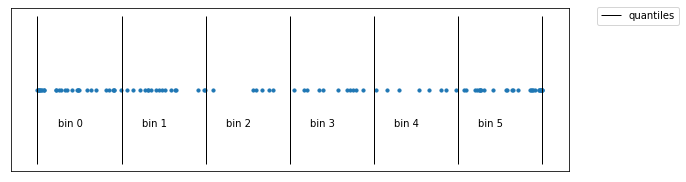

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
points = np.random.beta(.5, .5, size=100)
plt.scatter(points, np.zeros(100), s=10)
bin_edges = np.linspace(points.min(), points.max(), 7)
plt.vlines(bin_edges, ymin=-.1, ymax=.1, lw=1, label='quantiles')
plt.xticks(())
plt.yticks(())
plt.legend(loc=(1.05, .9))
for i, (q1, q2) in enumerate(zip(bin_edges, bin_edges[1:])):
    #plt.text((q1 + q2)/2, -.05, f"bin {i}")
    plt.text(q1 + 0.04, -.05, f"bin {i}")

plt.savefig("images/binning.png")

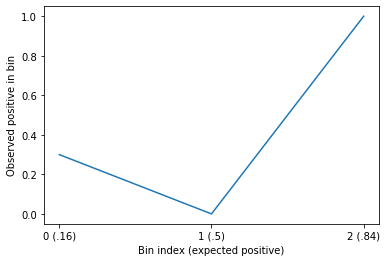

In [3]:
# toy plot
plt.plot([.3, 0, 1])
plt.xticks((0, 1, 2), ("0 (.16)", "1 (.5)", "2 (.84)"))
plt.xlabel("Bin index (expected positive)")
plt.ylabel("Observed positive in bin")
plt.savefig("images/calib_curve.png")

In [4]:
from sklearn.datasets import fetch_covtype
from sklearn.utils import check_array

def load_data(dtype=np.float32, order='C', random_state=13):
    ######################################################################
    # Load covertype dataset (downloads it from the web, might take a bit)
    data = fetch_covtype(download_if_missing=True, shuffle=True,
                         random_state=random_state)
    X = check_array(data['data'], dtype=dtype, order=order)
    # make it bineary classification
    y = (data['target'] != 1).astype(np.int)

    # Create train-test split (as [Joachims, 2006])
    n_train = 522911
    X_train = X[:n_train]
    y_train = y[:n_train]
    X_test = X[n_train:]
    y_test = y[n_train:]

    # Standardize first 10 features (the numerical ones)
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    mean[10:] = 0.0
    std[10:] = 1.0
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_data()

# subsample training set by a factor of 10:
X_train = X_train[::10]
y_train = y_train[::10]

/home/andy/checkout/scikit-learn/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [5]:
from sklearn.linear_model import LogisticRegressionCV
print(X_train.shape)
print(np.bincount(y_train))
lr = LogisticRegressionCV().fit(X_train, y_train)

(52292, 54)
[19036 33256]


/home/andy/checkout/scikit-learn/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/andy/checkout/scikit-learn/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warn

In [6]:
lr.C_

array([21.544])

In [7]:
print(lr.predict_proba(X_test)[:10])
print(y_test[:10])

[[0.681 0.319]
 [0.049 0.951]
 [0.706 0.294]
 [0.537 0.463]
 [0.819 0.181]
 [0.    1.   ]
 [0.794 0.206]
 [0.676 0.324]
 [0.727 0.273]
 [0.597 0.403]]
[0 1 0 1 1 1 0 0 0 1]


In [8]:
from sklearn.calibration import calibration_curve
probs = lr.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=5)
print(prob_true)
print(prob_pred)

[0.199 0.304 0.458 0.71  0.933]
[0.138 0.306 0.498 0.701 0.926]


Text(0.5, 1.0, 'n_bins=5')

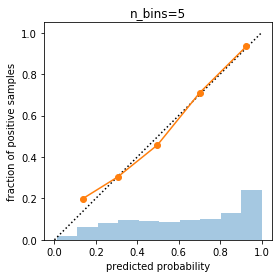

In [9]:
def plot_calibration_curve(y_true, y_prob, n_bins=5, ax=None, hist=True, normalize=False):
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=n_bins, normalize=normalize)
    if ax is None:
        ax = plt.gca()
    if hist:
        ax.hist(y_prob, weights=np.ones_like(y_prob) / len(y_prob), alpha=.4,
               bins=np.maximum(10, n_bins))
    ax.plot([0, 1], [0, 1], ':', c='k')
    curve = ax.plot(prob_pred, prob_true, marker="o")

    ax.set_xlabel("predicted probability")
    ax.set_ylabel("fraction of positive samples")

    ax.set(aspect='equal')
    return curve

    
plot_calibration_curve(y_test, probs)
plt.title("n_bins=5")

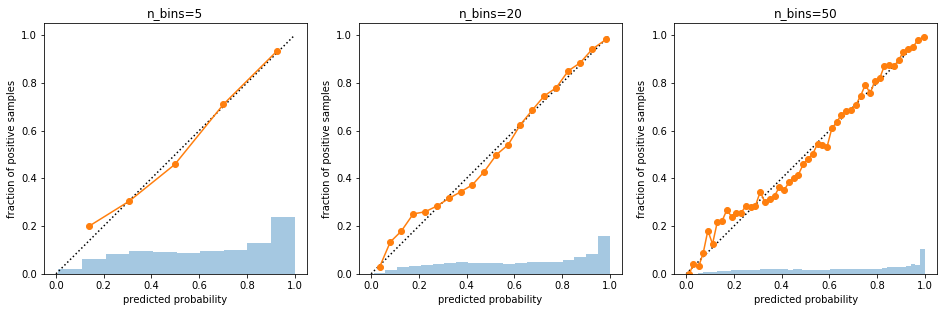

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
for ax, n_bins in zip(axes, [5, 20, 50]):
    plot_calibration_curve(y_test, probs, n_bins=n_bins, ax=ax)
    ax.set_title("n_bins={}".format(n_bins))
plt.savefig("images/influence_bins.png")

/home/andy/checkout/scikit-learn/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/andy/checkout/scikit-learn/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warn

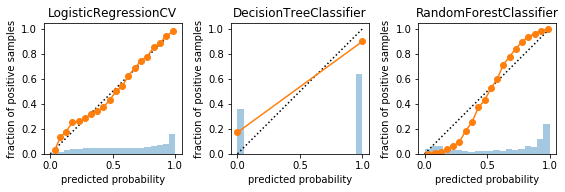

In [11]:
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
fig, axes = plt.subplots(1, 3, figsize=(8, 8))
for ax, clf in zip(axes, [LogisticRegressionCV(), DecisionTreeClassifier(),
                          RandomForestClassifier()]):
        # use predict_proba is the estimator has it
        scores = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
        plot_calibration_curve(y_test, scores, n_bins=20, ax=ax)
        ax.set_title(clf.__class__.__name__)

plt.tight_layout()
plt.savefig("images/calib_curve_models.png")

/home/andy/checkout/scikit-learn/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/andy/checkout/scikit-learn/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warn

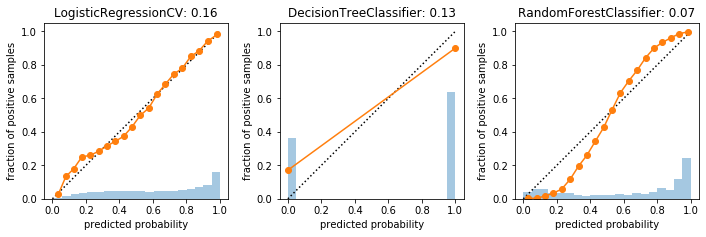

In [12]:
# same thing but with bier loss shown. Why do I refit the models? lol
from sklearn.metrics import brier_score_loss
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
for ax, clf in zip(axes, [LogisticRegressionCV(), DecisionTreeClassifier(), RandomForestClassifier()]):
        # use predict_proba is the estimator has it
        scores = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
        plot_calibration_curve(y_test, scores, n_bins=20, ax=ax)
        ax.set_title("{}: {:.2f}".format(clf.__class__.__name__, brier_score_loss(y_test, scores)))

plt.tight_layout()
plt.savefig("images/models_bscore.png")

In [13]:
from sklearn.calibration import CalibratedClassifierCV
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train,
                                                          stratify=y_train, random_state=0)

In [14]:
rf = RandomForestClassifier().fit(X_train_sub, y_train_sub)
scores = rf.predict_proba(X_test)[:, 1]

Text(0.5, 1.0, 'RandomForestClassifier: 0.077')

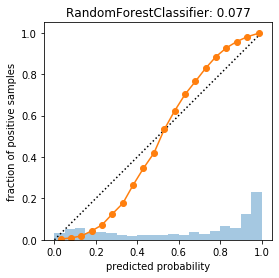

In [15]:
plot_calibration_curve(y_test, scores, n_bins=20)
plt.title("{}: {:.3f}".format(clf.__class__.__name__, brier_score_loss(y_test, scores)))

In [16]:
cal_rf = CalibratedClassifierCV(rf, cv="prefit", method='sigmoid')
cal_rf.fit(X_val, y_val)
scores_sigm = cal_rf.predict_proba(X_test)[:, 1]

cal_rf_iso = CalibratedClassifierCV(rf, cv="prefit", method='isotonic')
cal_rf_iso.fit(X_val, y_val)
scores_iso = cal_rf_iso.predict_proba(X_test)[:, 1]

In [17]:
scores_rf = cal_rf.predict_proba(X_val)

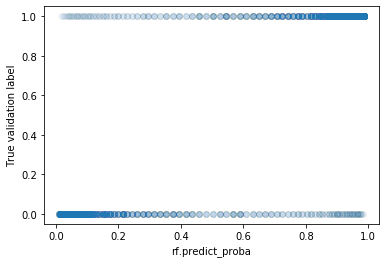

In [18]:
plt.plot(scores_rf[:, 1], y_val, 'o', alpha=.01)
plt.xlabel("rf.predict_proba")
plt.ylabel("True validation label")
plt.savefig("images/calibration_val_scores.png")

In [19]:
sigm = cal_rf.calibrated_classifiers_[0].calibrators_[0]
scores_rf_sorted = np.sort(scores_rf[:, 1])
sigm_scores = sigm.predict(scores_rf_sorted)

In [20]:
iso = cal_rf_iso.calibrated_classifiers_[0].calibrators_[0]
iso_scores = iso.predict(scores_rf_sorted)

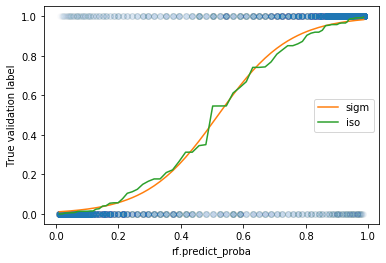

In [21]:
plt.plot(scores_rf[:, 1], y_val, 'o', alpha=.01)
plt.plot(scores_rf_sorted, sigm_scores, label='sigm')
plt.plot(scores_rf_sorted, iso_scores, label='iso')

plt.xlabel("rf.predict_proba")
plt.ylabel("True validation label")
plt.legend()
plt.savefig("images/calibration_val_scores_fitted.png")

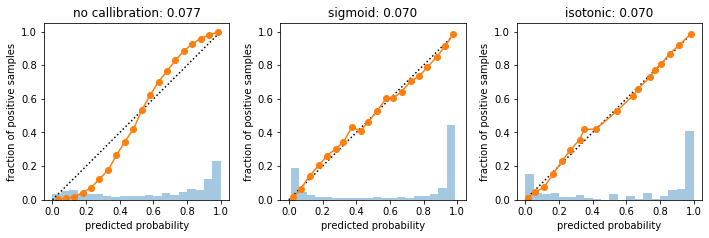

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic'],
                       [scores, scores_sigm, scores_iso], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()
plt.savefig("images/types_calib.png")

In [23]:
cal_rf_iso_cv = CalibratedClassifierCV(rf, method='isotonic')
cal_rf_iso_cv.fit(X_train, y_train)
scores_iso_cv = cal_rf_iso_cv.predict_proba(X_test)[:, 1]

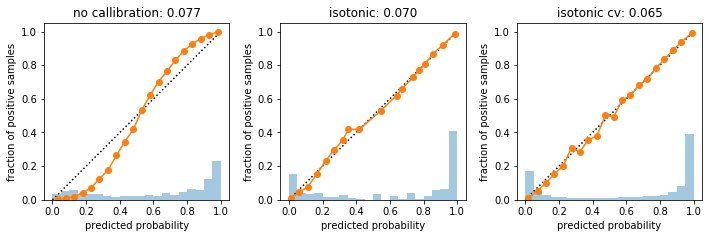

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'isotonic', 'isotonic cv'],
                       [scores, scores_iso, scores_iso_cv], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()
plt.savefig("images/types_calib_cv.png")

Log-loss of
 * uncalibrated classifier trained on 800 datapoints: 1.280 
 * classifier trained on 600 datapoints and calibrated on 200 datapoint: 0.534


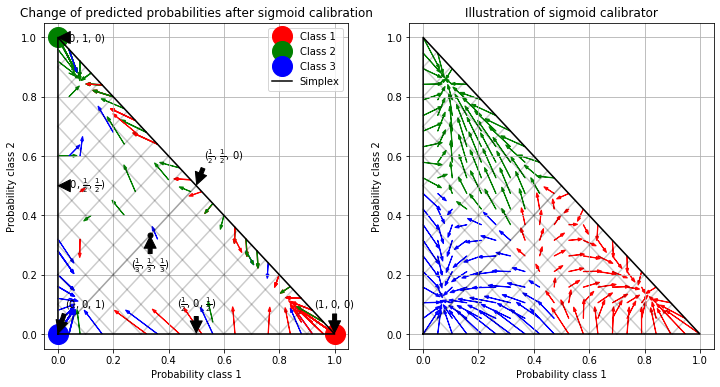

In [25]:
# http://scikit-learn.org/dev/auto_examples/calibration/plot_calibration_multiclass.html

# Author: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD Style.


import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss, brier_score_loss

np.random.seed(0)

# Generate data
X, y = make_blobs(n_samples=1000, n_features=2, random_state=42,
                  cluster_std=5.0)
X_train, y_train = X[:600], y[:600]
X_valid, y_valid = X[600:800], y[600:800]
X_train_valid, y_train_valid = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

# Train uncalibrated random forest classifier on whole train and validation
# data and evaluate on test data
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train_valid, y_train_valid)
clf_probs = clf.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
#score = brier_score_loss(y_test, clf_probs[:, 1])

# Train random forest classifier, calibrate on validation data and evaluate
# on test data
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train, y_train)
clf_probs = clf.predict_proba(X_test)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", cv="prefit")
sig_clf.fit(X_valid, y_valid)
sig_clf_probs = sig_clf.predict_proba(X_test)
sig_score = log_loss(y_test, sig_clf_probs)
#sig_score = brier_score_loss(y_test, sig_clf_probs[:, 1])

# Plot changes in predicted probabilities via arrows
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
colors = ["r", "g", "b"]
for i in range(clf_probs.shape[0]):
    plt.arrow(clf_probs[i, 0], clf_probs[i, 1],
              sig_clf_probs[i, 0] - clf_probs[i, 0],
              sig_clf_probs[i, 1] - clf_probs[i, 1],
              color=colors[y_test[i]], head_width=1e-2)

# Plot perfect predictions
plt.plot([1.0], [0.0], 'ro', ms=20, label="Class 1")
plt.plot([0.0], [1.0], 'go', ms=20, label="Class 2")
plt.plot([0.0], [0.0], 'bo', ms=20, label="Class 3")

# Plot boundaries of unit simplex
plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], 'k', label="Simplex")

# Annotate points on the simplex
plt.annotate(r'($\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{3}$)',
             xy=(1.0/3, 1.0/3), xytext=(1.0/3, .23), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.plot([1.0/3], [1.0/3], 'ko', ms=5)
plt.annotate(r'($\frac{1}{2}$, $0$, $\frac{1}{2}$)',
             xy=(.5, .0), xytext=(.5, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $\frac{1}{2}$, $\frac{1}{2}$)',
             xy=(.0, .5), xytext=(.1, .5), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($\frac{1}{2}$, $\frac{1}{2}$, $0$)',
             xy=(.5, .5), xytext=(.6, .6), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $0$, $1$)',
             xy=(0, 0), xytext=(.1, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($1$, $0$, $0$)',
             xy=(1, 0), xytext=(1, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $1$, $0$)',
             xy=(0, 1), xytext=(.1, 1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
# Add grid
plt.grid("off")
for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    plt.plot([0, x], [x, 0], 'k', alpha=0.2)
    plt.plot([0, 0 + (1-x)/2], [x, x + (1-x)/2], 'k', alpha=0.2)
    plt.plot([x, x + (1-x)/2], [0, 0 + (1-x)/2], 'k', alpha=0.2)

plt.title("Change of predicted probabilities after sigmoid calibration")
plt.xlabel("Probability class 1")
plt.ylabel("Probability class 2")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.legend(loc="best")

print("Log-loss of")
print(" * uncalibrated classifier trained on 800 datapoints: %.3f "
      % score)
print(" * classifier trained on 600 datapoints and calibrated on "
      "200 datapoint: %.3f" % sig_score)

# Illustrate calibrator
plt.subplot(1, 2, 2)
# generate grid over 2-simplex
p1d = np.linspace(0, 1, 20)
p0, p1 = np.meshgrid(p1d, p1d)
p2 = 1 - p0 - p1
p = np.c_[p0.ravel(), p1.ravel(), p2.ravel()]
p = p[p[:, 2] >= 0]

calibrated_classifier = sig_clf.calibrated_classifiers_[0]
prediction = np.vstack([calibrator.predict(this_p)
                        for calibrator, this_p in
                        zip(calibrated_classifier.calibrators_, p.T)]).T
prediction /= prediction.sum(axis=1)[:, None]

# Plot modifications of calibrator
for i in range(prediction.shape[0]):
    plt.arrow(p[i, 0], p[i, 1],
              prediction[i, 0] - p[i, 0], prediction[i, 1] - p[i, 1],
              head_width=1e-2, color=colors[np.argmax(p[i])])
# Plot boundaries of unit simplex
plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], 'k', label="Simplex")

plt.grid("off")
for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    plt.plot([0, x], [x, 0], 'k', alpha=0.2)
    plt.plot([0, 0 + (1-x)/2], [x, x + (1-x)/2], 'k', alpha=0.2)
    plt.plot([x, x + (1-x)/2], [0, 0 + (1-x)/2], 'k', alpha=0.2)

plt.title("Illustration of sigmoid calibrator")
plt.xlabel("Probability class 1")
plt.ylabel("Probability class 2")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.savefig("images/multi_class_calibration.png")